<a href="https://colab.research.google.com/github/Untick/IrisID_gr1/blob/main/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD_%D0%9F%D0%B5%D0%BD%D0%B7%D0%BE%D0%B2_01_05_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ШАГ 1.**
Для первоначального решения задачи не стал вычищать базу, а оставил только файлы формата jpg и jpeg. Некотрые папки (виды одежды) удалил целиком. На следующих шагах использую "исправленну" базу.

In [9]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для генерации случайных чисел 
import random 

# Библиотека работы с массивами
import numpy as np 

# Для работы с файлами 
import os 

# импортируем модуль для загрузки данных
import gdown

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam 

# модуль для отсчета времени
import time

# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Импорт модуля для работы с архивами
import zipfile

Mounted at /content/gdrive


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, UpSampling2D
from tensorflow.keras.models import Model

In [10]:
# Путь к архивному файлу
file_path = '/content/gdrive/MyDrive/test_230501.zip'

# Путь к директории, в которую нужно разархивировать файл
extract_path = '/content/selector'

# Разархивирование файла
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [11]:
# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/selector/test_230501/' 

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH) 

['dress solemn',
 'shirt men',
 't-shirt women',
 't-shirt men',
 'dress casual',
 'sportswear women',
 'dress homemade',
 'shirt women',
 'dress  business']

In [12]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 9, метки классов: ['dress  business', 'dress casual', 'dress homemade', 'dress solemn', 'shirt men', 'shirt women', 'sportswear women', 't-shirt men', 't-shirt women']


In [ ]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

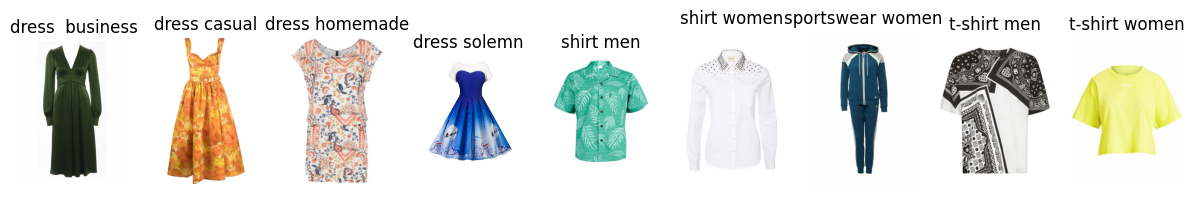

In [18]:
# Отобразим визуально для примера по одному изображению из каждого класса
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(15, 15))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path)) 
    
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [21]:
# Загрузка данных
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # аугментация данных во время обучения и нормализации пикселей изображений
train_generator = train_datagen.flow_from_directory(directory='/content/selector/test_230501', target_size=(64, 64), batch_size=32, class_mode='input')

# Определение архитектуры автокодировщика
input_img = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Обучение автокодировщика
autoencoder.fit(train_generator, epochs=10)

Found 7650 images belonging to 9 classes.
Epoch 1/10
240/240 [==============================] - 221s 915ms/step - loss: 0.0422
Epoch 2/10
240/240 [==============================] - 227s 944ms/step - loss: 0.0188
Epoch 3/10
240/240 [==============================] - 213s 888ms/step - loss: 0.0152
Epoch 4/10
240/240 [==============================] - 213s 886ms/step - loss: 0.0140
Epoch 5/10
240/240 [==============================] - 214s 889ms/step - loss: 0.0132
Epoch 6/10
240/240 [==============================] - 213s 884ms/step - loss: 0.0126
Epoch 7/10
240/240 [==============================] - 213s 888ms/step - loss: 0.0121
Epoch 8/10
240/240 [==============================] - 213s 886ms/step - loss: 0.0118
Epoch 9/10
240/240 [==============================] - 213s 883ms/step - loss: 0.0116
Epoch 10/10
240/240 [==============================] - 212s 883ms/step - loss: 0.0113


In [22]:
# Использование обученного автокодировщика для восстановления изображений
test_image = tf.keras.preprocessing.image.load_img('/content/selector/test/tast_dress_wb.jpg', target_size=(64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0
test_image = tf.expand_dims(test_image, axis=0)
decoded_image = autoencoder.predict(test_image)

1/1 [==============================] - 0s 262ms/step


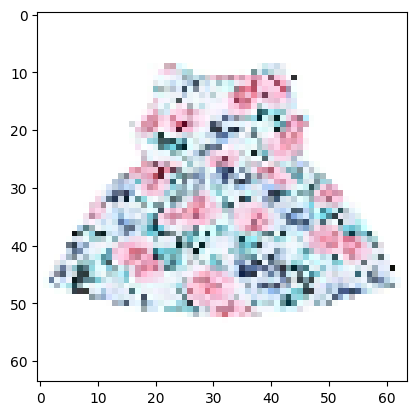

In [32]:
# Вывод исходного изображения
plt.imshow(test_image.numpy().reshape(64, 64, 3))
# Показать графики
plt.show()



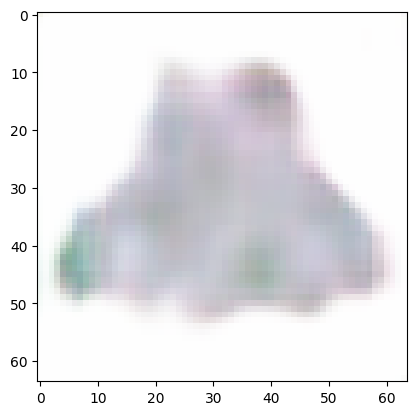

In [29]:
# Вывод полученного изображения
plt.imshow(decoded_image.reshape(64, 64, 3))

# Показать графики
plt.show()

In [35]:
# Использование обученного автокодировщика для восстановления изображений
test_image = tf.keras.preprocessing.image.load_img('/content/selector/test/shirt men_wb.jpg', target_size=(64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0
test_image = tf.expand_dims(test_image, axis=0)
decoded_image = autoencoder.predict(test_image)

1/1 [==============================] - 0s 28ms/step


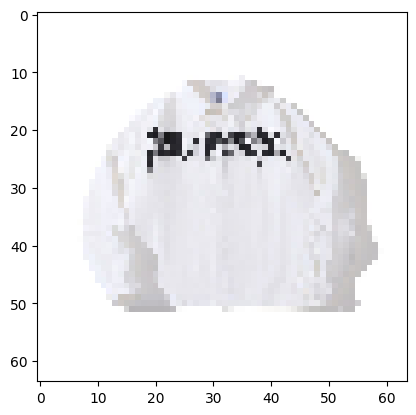

In [36]:
# Вывод исходного изображения
plt.imshow(test_image.numpy().reshape(64, 64, 3))
# Показать графики
plt.show()

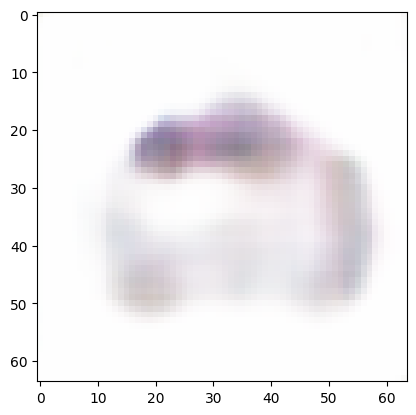

In [37]:
# Вывод полученного изображения
plt.imshow(decoded_image.reshape(64, 64, 3))

# Показать графики
plt.show()

# **Вывод:** визуально понятно, что принципиально "цветное пятно" похоже по форме и частично по цвету, но о совпадении очень-очень-очень далеко 